In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import set_matplotlib_hangul
set_matplotlib_hangul
plt.style.use('seaborn')
sns.set(font_scale=2.5) 
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
titanic = pd.read_excel('titanic.xls')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [7]:
titanic['age'].shape[0]

1309

In [25]:
# 결측 데이터 비율을 확인하는 코드
for col in titanic.columns:
	msg = 'column: {:>10}\t NaN값 비율은 : {:.2f}%'.format(col, 100 * (titanic[col].isnull().sum() / titanic[col].shape[0]))
	print(msg)


column:     pclass	 NaN값 비율은 : 0.00%
column:   survived	 NaN값 비율은 : 0.00%
column:       name	 NaN값 비율은 : 0.00%
column:        sex	 NaN값 비율은 : 0.00%
column:        age	 NaN값 비율은 : 20.09%
column:      sibsp	 NaN값 비율은 : 0.00%
column:      parch	 NaN값 비율은 : 0.00%
column:     ticket	 NaN값 비율은 : 0.00%
column:       fare	 NaN값 비율은 : 0.08%
column:      cabin	 NaN값 비율은 : 77.46%
column:   embarked	 NaN값 비율은 : 0.15%
column:       boat	 NaN값 비율은 : 62.87%
column:       body	 NaN값 비율은 : 90.76%
column:  home.dest	 NaN값 비율은 : 43.09%


<Axes: >

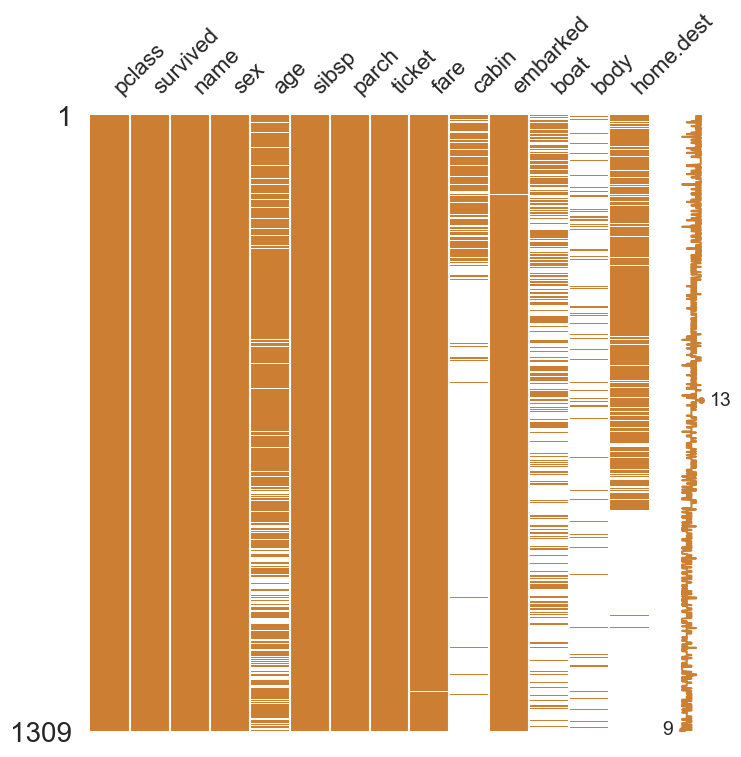

In [9]:
msno.matrix(df=titanic.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<Axes: >

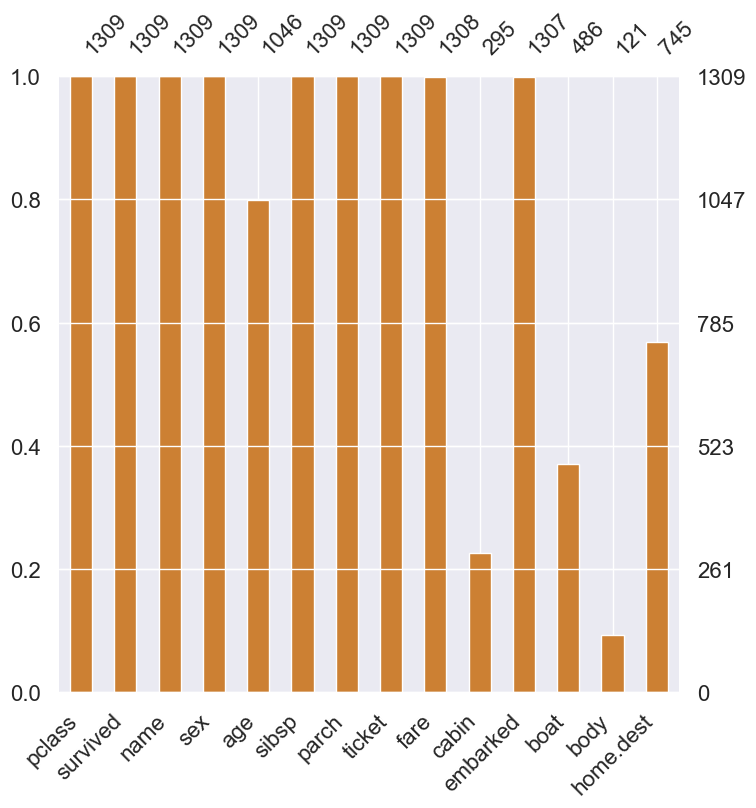

In [15]:
msno.bar(df=titanic.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

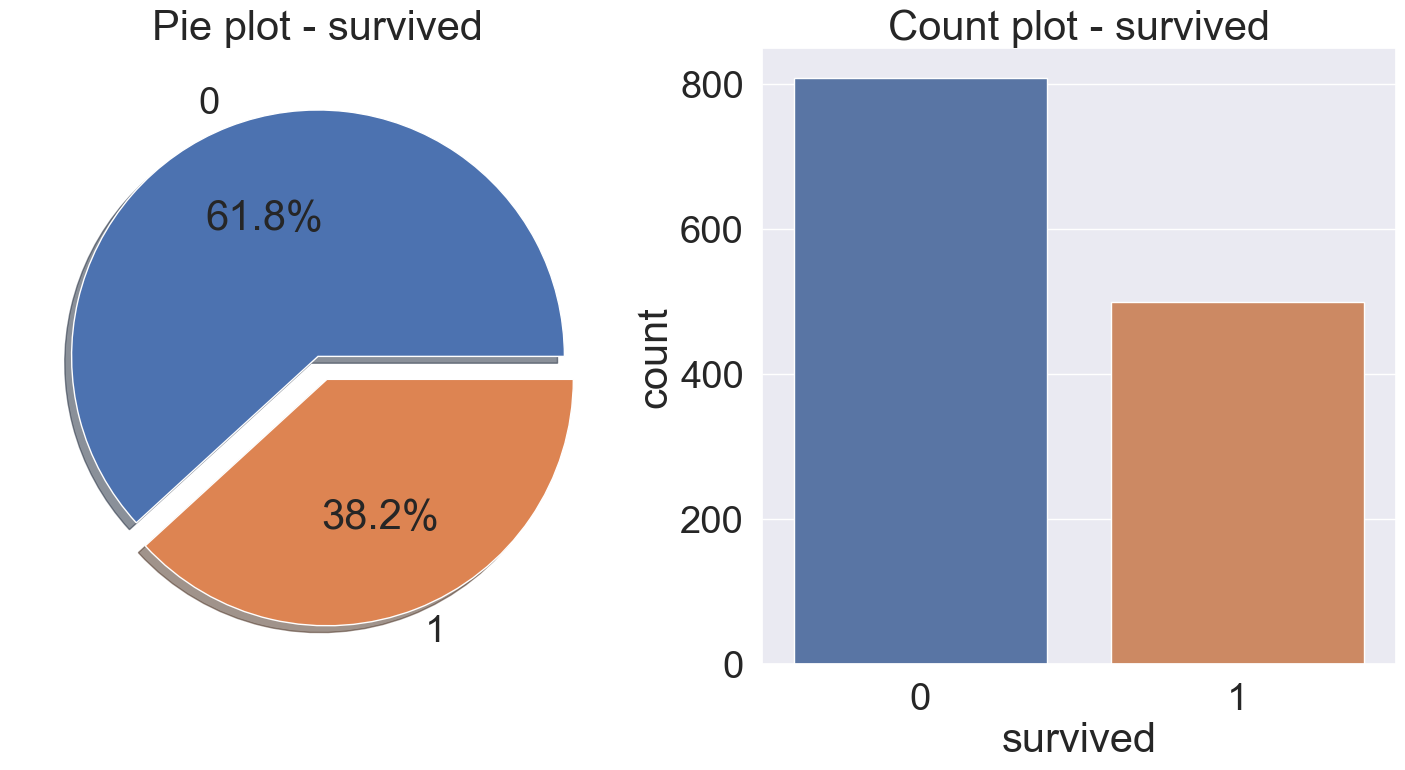

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

titanic['survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - survived')
ax[0].set_ylabel('')
sns.countplot(x= 'survived', data=titanic, ax=ax[1])
ax[1].set_title('Count plot - survived')

plt.show()

In [14]:
titanic[['pclass', 'survived']].groupby(['pclass'], as_index=True).count()

,survived
pclass,
1,323
2,277
3,709


In [35]:
pd.crosstab(titanic['pclass'], titanic['survived'], margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


In [37]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(titanic['age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(titanic['age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(titanic['age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.2 Years
탑승객 평균 나이 : 29.9 Years


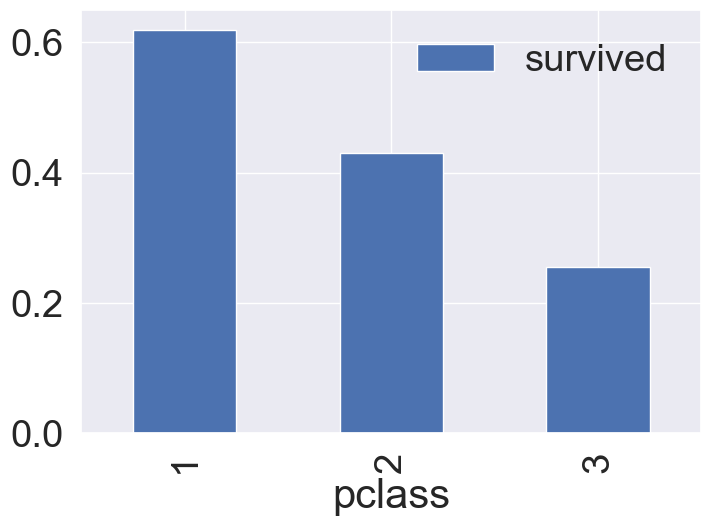

In [18]:
titanic[['pclass', 'survived']].groupby(['pclass'], as_index=True).mean().sort_values(by='survived', ascending=False).plot.bar();

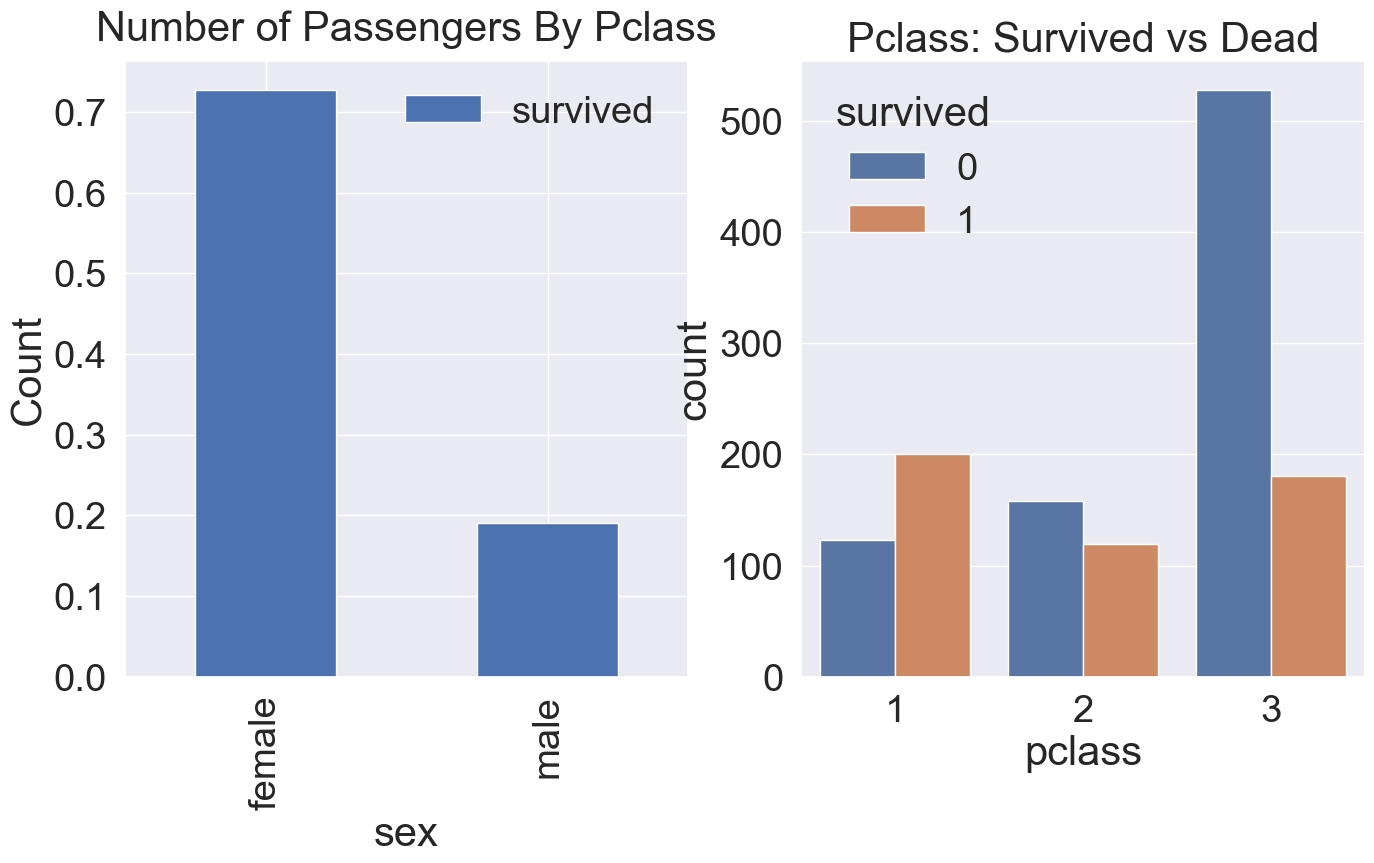

In [30]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(16, 8))
titanic[['sex', 'survived']].groupby(['sex'], as_index = True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='pclass', hue='survived', data=titanic, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

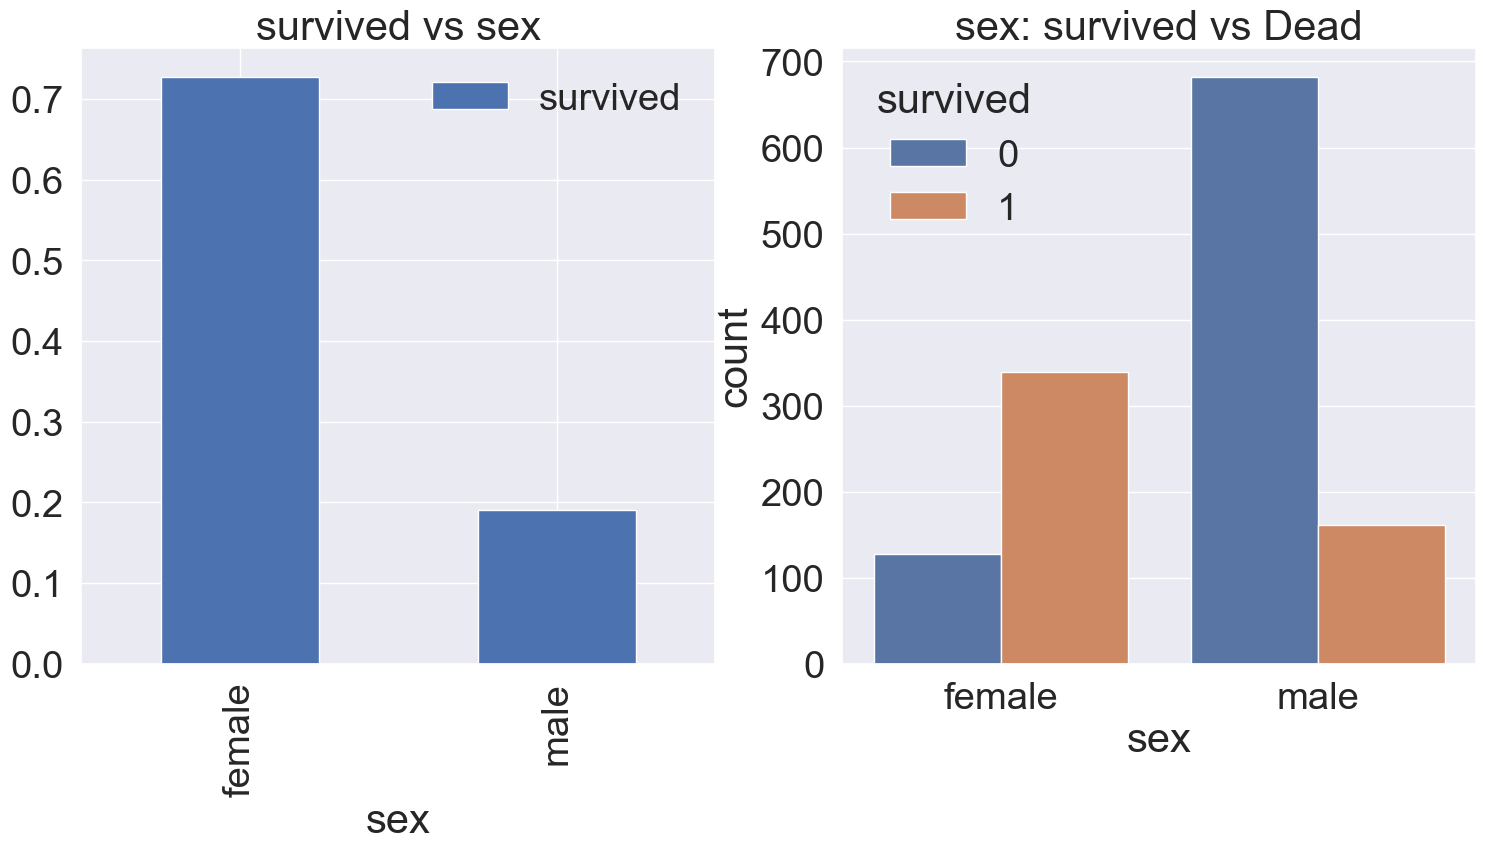

In [35]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
titanic[['sex', 'survived']].groupby(['sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('survived vs sex')
sns.countplot(x='sex', hue='survived', data=titanic, ax=ax[1])
ax[1].set_title('sex: survived vs Dead')
plt.show()

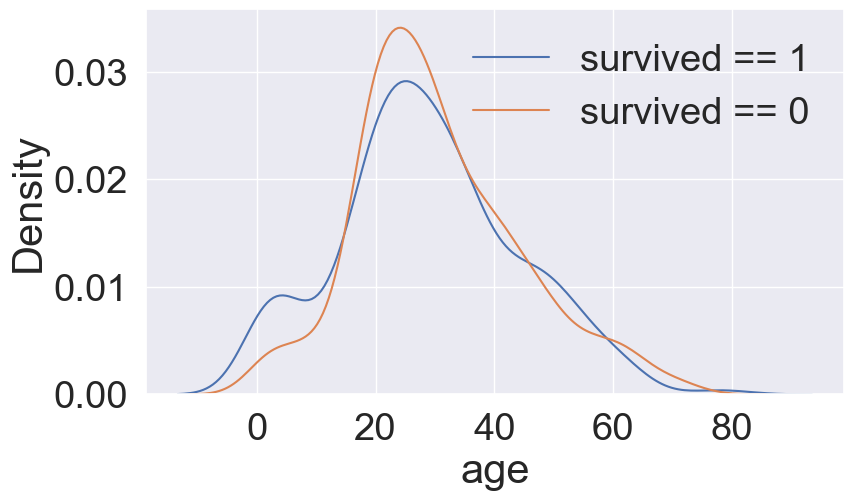

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(titanic[titanic['survived'] == 1]['age'], ax=ax)
sns.kdeplot(titanic[titanic['survived'] == 0]['age'], ax=ax)
plt.legend(['survived == 1', 'survived == 0'])
plt.show()

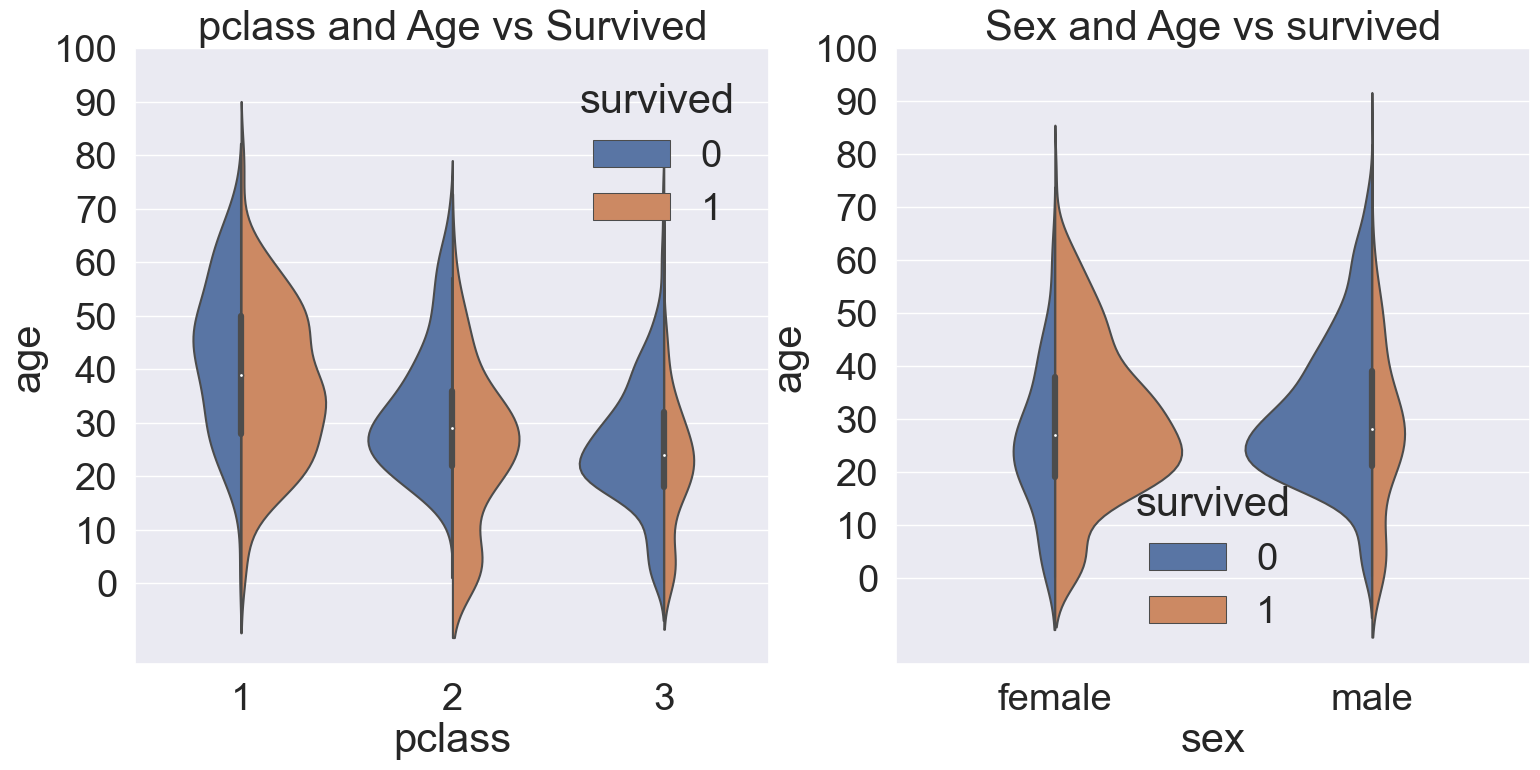

In [40]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="pclass",y="age", hue="survived", data=titanic, scale='count', split=True,ax=ax[0])
ax[0].set_title('pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="sex",y="age", hue="survived", data=titanic, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [42]:
pd.crosstab([titanic.sex, titanic.survived], titanic.pclass , margins = True).style.background_gradient(cmap = 'summer_r')

sns.factorplot('pclass','survived', hue = 'sex', data=titanic)
plt.show()

AttributeError: module 'seaborn' has no attribute 'factorplot'